# Infrared Spectral Transmittance of $\mathrm{CO_2}$: Molecular Absorption #

The American **National Institute of Standards and Technology (NIST)** hosts a large database of all kinds of chemical spectra

The collection of $CO_2$ data can be found here: https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Type=IR-SPEC&Index=1

Clicking the link https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C124389&Index=1&Type=IR on that website initiates a download of the IR spectral data in JCAMP DX format (JCAMP: "Joint Committee on Atomic and Molecular Physical Data", DX: Data Exchange) 

Somebody has already developed a module to read jcamp files. You can install the module by calling

`pip install jcamp`

e.g. in an Anaconda prompt or another terminal (command window).





In [39]:
from jcamp import JCAMP_reader

In [40]:
filename = "124-38-9-IR.jdx"

In [41]:
spec = JCAMP_reader(filename)

In [42]:
type(spec)

dict

In [43]:
x = spec["x"]
y = spec["y"]

In [44]:
import matplotlib.pyplot as plt

In [45]:
# config the plot size
plt.rcParams['figure.figsize'] = (6,4) # Set the default figure size. You have to calibrate DPI
plt.rcParams['figure.dpi'] = 136
plt.show()

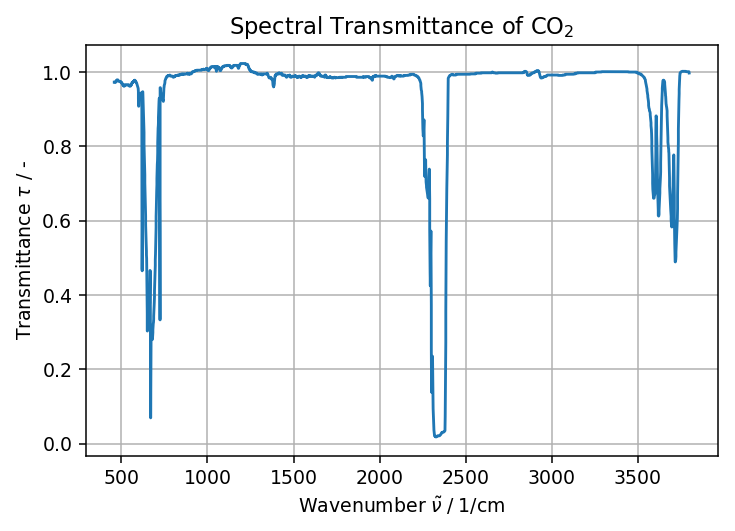

In [46]:
fig = plt.figure()
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
ax = fig.add_subplot(111)
#plt.plot(x,y*100)
plt.plot(x,y)
ax.set_title("Spectral Transmittance of $\mathrm{CO_2}$")
ax.set_xlabel(r"Wavenumber $\tilde{\nu} \; / \; \mathrm{1/cm}$")
ax.set_ylabel(r"Transmittance $\tau$ / -")
ax.grid(True)
plt.show()

In [47]:
print("Wavenumber $\tilde{\nu}$ / 1/cm")
print(r"Wavenumber $\tilde{\nu}$ / 1/cm")

Wavenumber $	ilde{
u}$ / 1/cm
Wavenumber $\tilde{\nu}$ / 1/cm


## Energy Conservation ##
Energy conservation related to interaction of incoming radiation with material:<br>
$\rho$: reflectance <br>
$\tau$: transmittance <br>
$\alpha$: absorptance, absorbance

$\rho + \tau + \alpha = 1$

In our case $\rho = 0 \Leftrightarrow \alpha = 1 - \tau$



## Relationship of wavenumber, wavelength and frequency ##

$\tilde{\nu} = \frac{1}{\lambda}$

$\tilde{\nu} = {1 \over \lambda}$

$T = 1/f$

$c = \lambda \nu \Leftrightarrow \mathrm{wave number}\; \tilde{\nu} = 1/\lambda = \nu / c = \tilde{\nu} $

$c = \lambda f$

$\nu v$

**Exercise:** Plot the Spectral Absorbance of $\mathrm{CO_2}$ over wavelength in $\mu m$.

In [48]:
nut = spec["x"] # nu tilde
tau = spec["y"] # tau

In [49]:
type(tau)

numpy.ndarray

In [50]:
alpha = 1 - tau # absorbance

In [51]:
type(alpha)

numpy.ndarray

In [52]:
# config the plot size
#plt.rcParams['figure.figsize'] = (8,4) # Set the default figure size. You have to calibrate DPI
#plt.rcParams['figure.dpi'] = 136

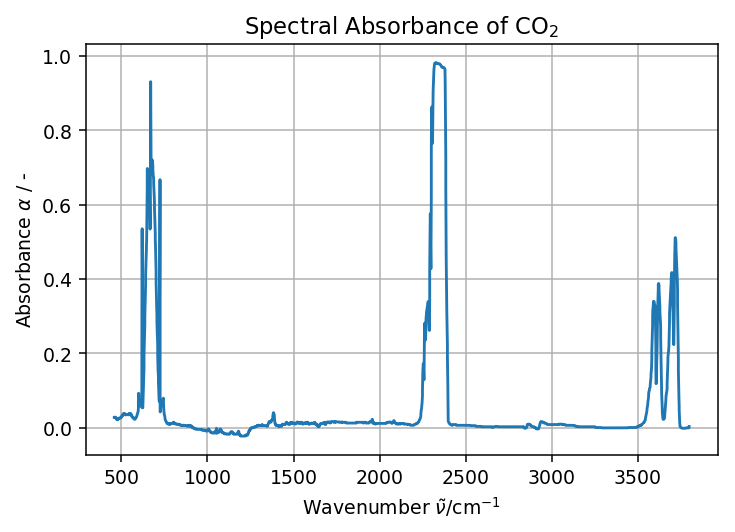

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(nut,alpha)
ax.set_title("Spectral Absorbance of $\mathrm{CO_2}$")
ax.set_xlabel(r"Wavenumber $\tilde{\nu} / \mathrm{cm^{-1}}$")
ax.set_ylabel(r"Absorbance $\alpha$ / -")
ax.grid(True)
plt.show()

In [54]:
nut_per_cm = spec["x"] # unit: 1/cm

In [55]:
nut_per_m = 100 * nut_per_cm # unit: 1/m

In [56]:
lam = 1/nut_per_m # unit: m

In [57]:
lam_in_um = lam * 1e6 # unit: um

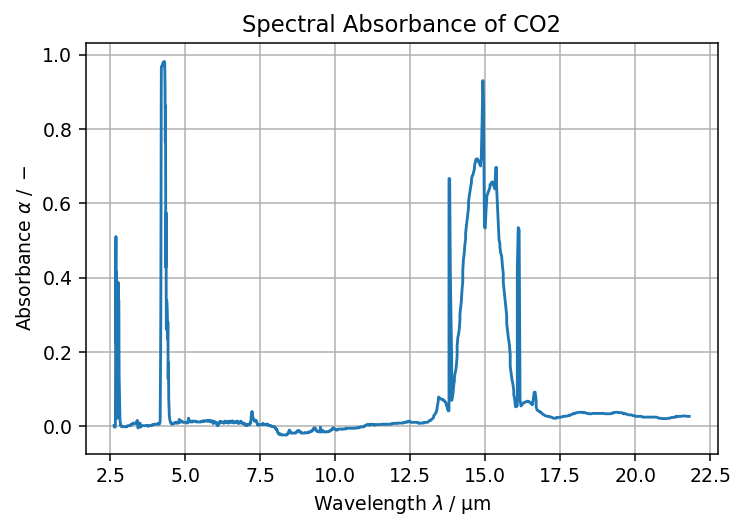

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lam_in_um,alpha)
ax.set_title("Spectral Absorbance of CO2")
ax.set_xlabel(r"Wavelength $\lambda \; / \; \mathrm{\mu m}$")
ax.set_ylabel(r"Absorbance $\alpha \; / \;-$")
ax.grid(True)
plt.show()

In [59]:
spec.keys()

dict_keys(['title', 'jcamp-dx', 'data type', 'class', 'origin', 'owner', 'date', 'names', 'cas registry no', 'molform', 'source reference', '$nist source', '$nist image', 'spectrometer/data system', 'instrument parameters', 'state', 'path length', 'sampling procedure', 'resolution', 'data processing', 'xunits', 'yunits', 'xfactor', 'yfactor', 'deltax', 'firstx', 'lastx', 'firsty', 'maxx', 'minx', 'maxy', 'miny', 'npoints', 'xydata', 'end', 'x', 'y', 'filename'])

In [60]:
spec["xunits"]

'1/CM'

**Planck's Black Body Radiation**
$$e_\lambda(\lambda,T) = {c_1 \over \lambda^5 (\exp(c_2 / (\lambda T))-1) }$$

**Stefan-Boltzmann**
$$e_T = \sigma\cdot T^4$$

In [61]:
import scipy.constants as sc
import numpy as np

def planck(lam,T):
    s = sc.sigma # Stefan-Boltzmann constant
    h = sc.h # Planck constant
    k = sc.k # Boltzmann constant
    c = sc.c # Speed of light    
    c1 = 2*h*c**2
    c2 = h*c/k
    e_lam = (c1 / lam ** 5) * ( 1 / (np.exp(c2 / (lam * T)) -1 ) )
    return e_lam # spectral exitance

In [62]:
#lam = np.arange(1e-18,30000)*1e-9
lam # from the IR spectrum, in m

array([2.17922372e-05, 2.17368987e-05, 2.16818406e-05, ...,
       2.63481142e-06, 2.63416180e-06, 2.63351250e-06])

In [63]:
T = 273.15 + 15 # 15°C
e_lam = planck(lam,T)

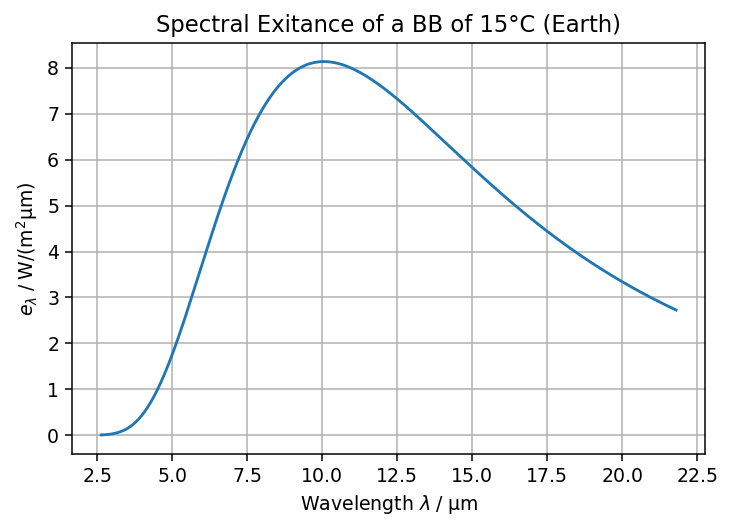

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lam*1e6,e_lam*1e-6)
ax.set_title("Spectral Exitance of a BB of 15°C (Earth)")
ax.set_ylabel(r"$e_\lambda \; / \; \mathrm{W/(m^2 \mu m)}$")
ax.set_xlabel(r"Wavelength $\lambda \; / \; \mathrm{\mu m}$")
ax.grid(True)
plt.show()

In [65]:
e_abs = e_lam * alpha # available radiation * spectral absorbance

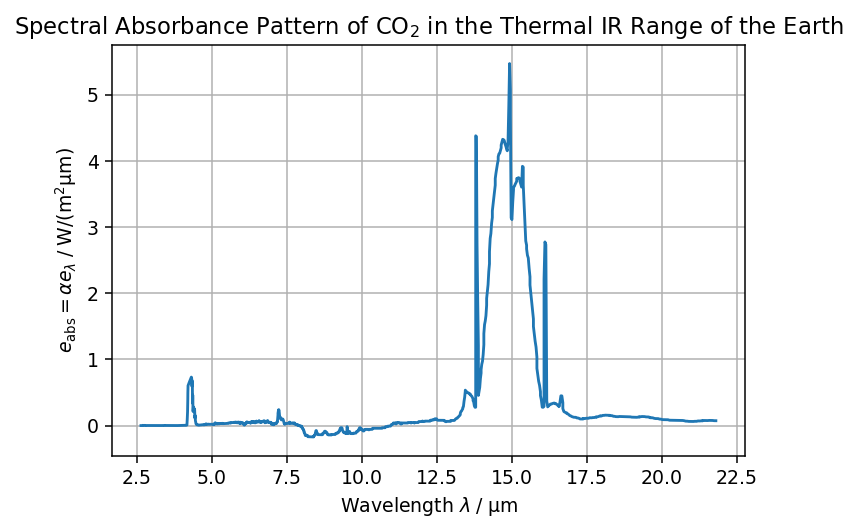

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lam*1e6,e_abs*1e-6)
ax.set_title("Spectral Absorbance Pattern of $\mathrm{CO_2}$ in the Thermal IR Range of the Earth")
ax.set_ylabel(r"$e_\mathrm{abs} = \alpha e_\lambda \; / \; \mathrm{W/(m^2 \mu m)}$")
ax.set_xlabel(r"Wavelength $\lambda \;/\; \mathrm{\mu m}$")
ax.grid(True)
plt.show()